# Pre Requsits

In [22]:
!git clone https://github.com/Djone08/Sign_Language_Detection


Cloning into 'Sign_Language_Detection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
# Run Once
from google.colab import drive
drive.mount('/content/drive')
!pip install tensorflow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Statemens

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

# Converting Pixel Data CSV to Image Folder

In [ ]:
# @title Setting File Path
path = '/content/drive/MyDrive/Sign Language MNIST Data'
# os.chdir(path)

In [ ]:
# @title Clear Existing Data Set

# if os.path.exists('Test'):
#   for files in os.walk('Test'):
#     for f in files[2]:
#       os.remove(f'{files[0]}/{f}')

#   os.rmdir('Test')

# if os.path.exists('Train'):
#   for files in os.walk('Train'):
#     for f in files[2]:

#       os.remove(f'{files[0]}/{f}')

#   os.rmdir('Train')

In [ ]:
# @title Loading Test and Train Data

test_data = pd.read_csv(f'{path}/sign_mnist_test.csv')
test_data.label = (test_data.label + 65).apply(chr)

train_data = pd.read_csv(f'{path}/sign_mnist_train.csv')
train_data.label = (train_data.label + 65).apply(chr)

In [ ]:
# @title Creating Test Data Folder

if not os.path.isdir('Test'):
  os.mkdir('Test')

  for label, df in train_data.groupby('label'):
    df.reset_index(drop=True, inplace=True)

    print(label, df.shape)

    df.apply(lambda x:
            keras.utils.save_img(f'Test/{label}_{x.name:>04}.jpeg',
                                  x.iloc[1:].values.reshape(28,28,1)),
            axis=1)

    print(f'Test {label} Images Loaded')

else:
  print('Test Folder Already Exists')

A (1126, 785)
Test A Images Loaded
B (1010, 785)
Test B Images Loaded
C (1144, 785)
Test C Images Loaded
D (1196, 785)
Test D Images Loaded
E (957, 785)
Test E Images Loaded
F (1204, 785)
Test F Images Loaded
G (1090, 785)
Test G Images Loaded
H (1013, 785)
Test H Images Loaded
I (1162, 785)
Test I Images Loaded
K (1114, 785)
Test K Images Loaded
L (1241, 785)
Test L Images Loaded
M (1055, 785)
Test M Images Loaded
N (1151, 785)
Test N Images Loaded
O (1196, 785)
Test O Images Loaded
P (1088, 785)
Test P Images Loaded
Q (1279, 785)
Test Q Images Loaded
R (1294, 785)
Test R Images Loaded
S (1199, 785)
Test S Images Loaded
T (1186, 785)
Test T Images Loaded
U (1161, 785)
Test U Images Loaded
V (1082, 785)
Test V Images Loaded
W (1225, 785)
Test W Images Loaded
X (1164, 785)
Test X Images Loaded
Y (1118, 785)
Test Y Images Loaded


In [ ]:
# @title Creating Train Data Folder

if not os.path.isdir('Train'):
  os.mkdir('Train')

  for label, df in train_data.groupby('label'):
    df.reset_index(drop=True, inplace=True)

    print(label, df.shape)

    df.apply(lambda x:
            keras.utils.save_img(f'Train/{label}_{x.name:>04}.jpeg',
                                  x.iloc[1:].values.reshape(28,28,1)),
            axis=1)

    print(f'Train {label} Images Loaded')

else:
  print('Train Folder Already Exists')

A (1126, 785)
Train A Images Loaded
B (1010, 785)
Train B Images Loaded
C (1144, 785)
Train C Images Loaded
D (1196, 785)
Train D Images Loaded
E (957, 785)
Train E Images Loaded
F (1204, 785)
Train F Images Loaded
G (1090, 785)
Train G Images Loaded
H (1013, 785)
Train H Images Loaded
I (1162, 785)
Train I Images Loaded
K (1114, 785)
Train K Images Loaded
L (1241, 785)
Train L Images Loaded
M (1055, 785)
Train M Images Loaded
N (1151, 785)
Train N Images Loaded
O (1196, 785)
Train O Images Loaded
P (1088, 785)
Train P Images Loaded
Q (1279, 785)
Train Q Images Loaded
R (1294, 785)
Train R Images Loaded
S (1199, 785)
Train S Images Loaded
T (1186, 785)
Train T Images Loaded
U (1161, 785)
Train U Images Loaded
V (1082, 785)
Train V Images Loaded
W (1225, 785)
Train W Images Loaded
X (1164, 785)
Train X Images Loaded
Y (1118, 785)
Train Y Images Loaded


In [ ]:
test_path = f'Test'
train_path = f'Train'

In [ ]:
files = next(os.walk(train_path))
labels = pd.DataFrame(files[2], columns=['image_id'])
labels.loc[:, 'letter'] = labels.image_id.str[0]
labels.head()

,image_id,letter
0,L_0694.jpeg,L
1,C_0306.jpeg,C
2,F_0971.jpeg,F
3,M_0225.jpeg,M
4,I_0458.jpeg,I


In [ ]:
gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,
                         validation_split=0.2)

In [ ]:
train_generator = gen.flow_from_dataframe(
     labels, directory=train_path, x_col='image_id', y_col='letter',
     subset='training', color_mode='rgb', target_size=(331,331),
     class_mode='categorical', batch_size=50, shuffle=True, seed=42)

Found 21964 validated image filenames belonging to 24 classes.


In [ ]:
validation_generator = gen.flow_from_dataframe(
     labels, directory=train_path, x_col='image_id', y_col='letter',
     subset='validation', color_mode='rgb', target_size=(331,331),
     class_mode='categorical', batch_size=50, shuffle=True, seed=42)

Found 5491 validated image filenames belonging to 24 classes.


In [ ]:
x, y = next(train_generator)

a = train_generator.class_indices
class_names = list(a.keys())
x.shape

(50, 331, 331, 3)

In [ ]:
y.shape

(50, 24)

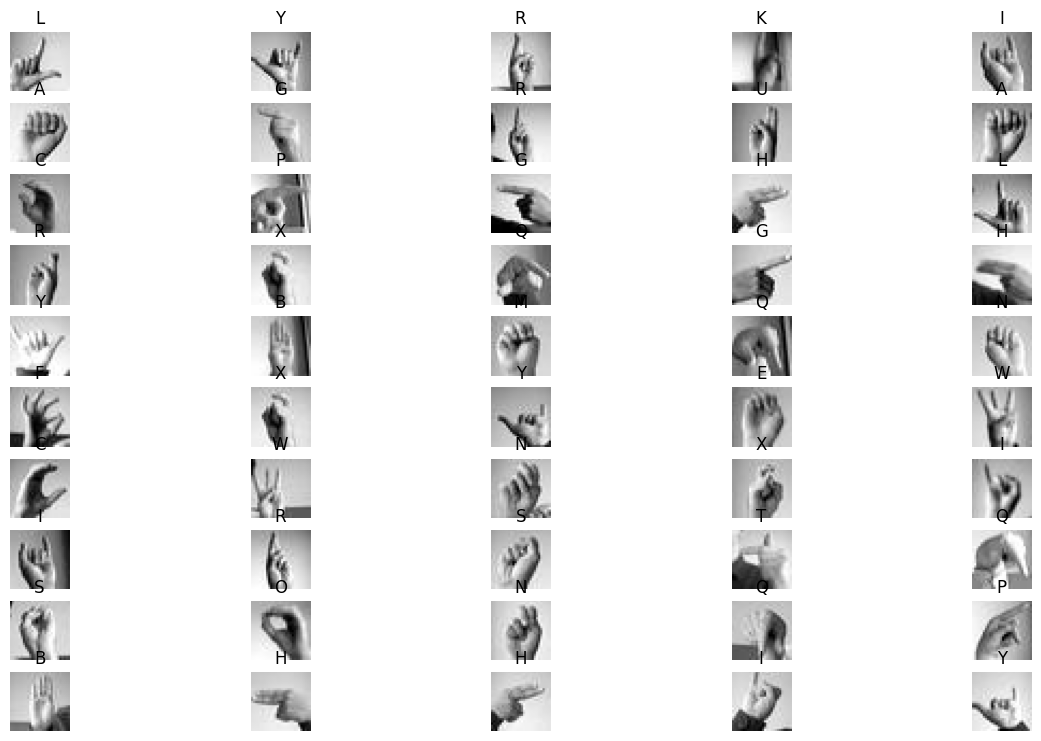

In [ ]:
def plot_images(img, _labels):
    plt.figure(figsize=(15, 10))

    for i in range(len(x)):
        plt.subplot(len(x)//5+1, 5, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(_labels[i])])
        plt.axis('off')

plot_images(x, y)

In [ ]:
base_model = applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=x[1].shape,
    )
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')])
model.build(input_shape=(None, 331, 331, 3))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 9, 9, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_203              │ (None, 9, 9, 1536)          │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           6,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,267,920 (210.83 MB)

 Trainable params: 928,112 (3.54 MB)

 Non-trainable params: 54,339,808 (207.29 MB)

In [ ]:
early = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [ ]:
batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

In [21]:
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=[early])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/439 ━━━━━━━━━━━━━━━━━━━━ 3:52:32 45s/step - accuracy: 0.4661 - loss: 1.8157

KeyboardInterrupt: 

In [ ]:
prediction = model.predict(x[0].reshape(1, 331, 331, 3))

In [ ]:
prediction[0]